## ML Project of Pratham Agarwal 102103607, Kavay Khurana 102103645


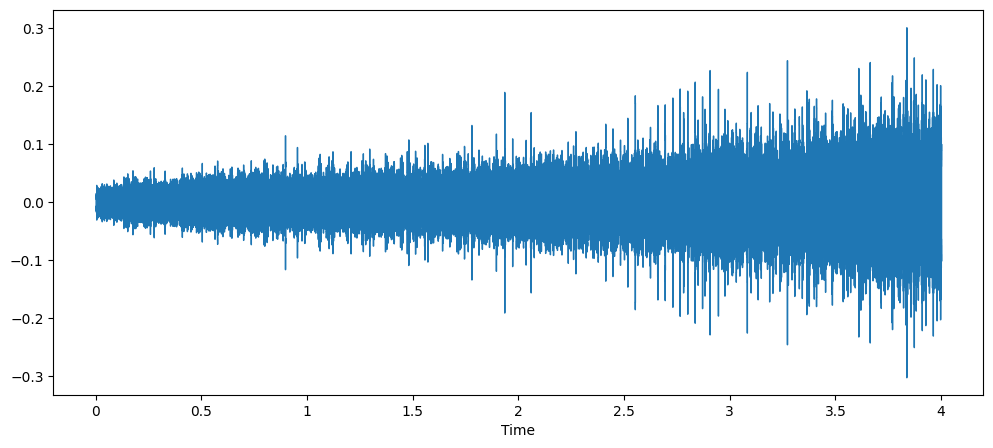

In [1]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa 
import librosa.display

filename = '/Users/prathamagarwal/Desktop/audio/audio/fold6/14114-4-0-0.wav'

plt.figure(figsize=(12,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)     

In [2]:
sample_rate    ### when reading with librosa, sample raate is always 22050, and sample rate is basically how may time a sound is sampled in a second

22050

In [3]:
### there are basically 2 channels in an audio, one is sterio and other is mono, sterio is both the ears will get same sound signals and in mono both will get different signals
###  different package will give different ssample rate

In [4]:
data   ##numeric values of the wave form and if we combine the values we'll get the graph again

array([-0.00012228,  0.00311135,  0.00078131, ...,  0.00726487,
       -0.01719657, -0.02620574], dtype=float32)

In [5]:
import pandas as pd

metadata = pd.read_csv('/Users/prathamagarwal/Desktop/audio/audio/metadata/UrbanSound8Knew.csv')
metadata.head(15)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,101281-3-0-0.wav,101281,0.341333,4.341333,2,6,3,dog_bark
1,101281-3-0-14.wav,101281,7.341333,11.341333,2,6,3,dog_bark
2,101281-3-0-5.wav,101281,2.841333,6.841333,2,6,3,dog_bark
3,104327-2-0-15.wav,104327,7.500000,11.500000,2,6,2,children_playing
4,104327-2-0-19.wav,104327,9.500000,13.500000,2,6,2,children_playing
5,104327-2-0-26.wav,104327,13.000000,17.000000,2,6,2,children_playing
6,104327-2-0-28.wav,104327,14.000000,18.000000,2,6,2,children_playing
7,104327-2-0-3.wav,104327,1.500000,5.500000,2,6,2,children_playing
8,104327-2-0-30.wav,104327,15.000000,19.000000,2,6,2,children_playing
9,104327-2-0-34.wav,104327,17.000000,21.000000,2,6,2,children_playing


In [6]:
metadata['class'].value_counts()      # checking the dataset by class

class
jackhammer          668
engine_idling       624
siren               607
dog_bark            600
children_playing    600
drilling            600
street_music        600
air_conditioner     600
car_horn            306
gun_shot            230
Name: count, dtype: int64

In [7]:
import librosa
audio_file_path = '/Users/prathamagarwal/Desktop/audio/audio/fold3/6988-5-0-1.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [8]:
print(librosa_audio_data)   #librosa automatically converts any audio data into mono channel and in 1D signal

[ 0.08506763  0.12634951  0.12069593 ... -0.7153524  -0.68133396
 -0.7252199 ]


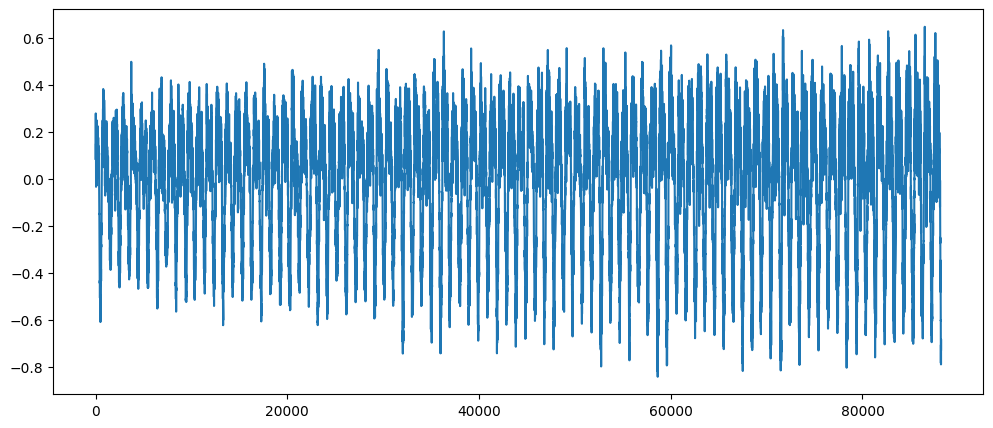

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(librosa_audio_data)

In [10]:
# here we'll see how 2 channels look like

In [11]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio  = wav.read(audio_file_path)

In [12]:
wave_audio

array([[  2549,   5047],
       [  2965,   4563],
       [  3598,   4089],
       ...,
       [-21413, -23990],
       [-21470, -23542],
       [-21440, -23269]], dtype=int16)

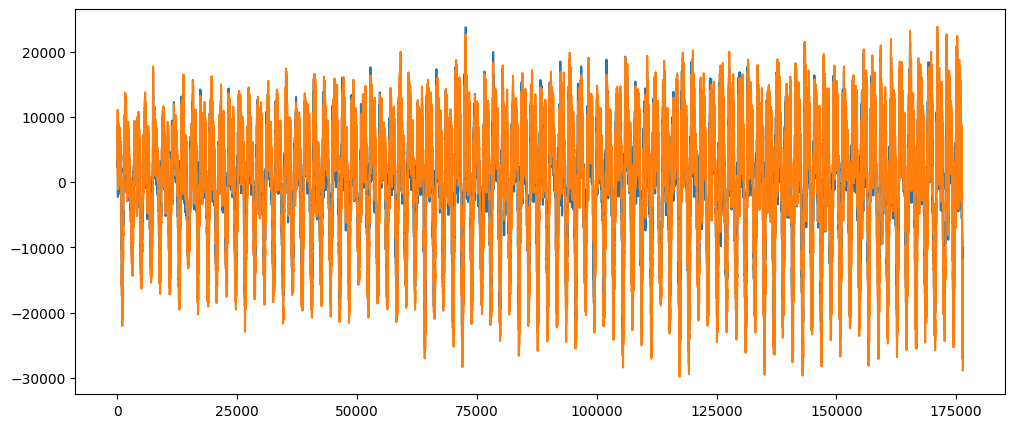

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(wave_audio)

In [14]:
# we'll take the above signals and create few independent features which will represent the audio data
# And we'll do that by "Mel-Frequency Cepstral  Cofficients(MFCC)"
# this wil convert the audio data into some new data which will have frequency and time character
# and this will allow us to identify features for classificaton


In [15]:
mfcc = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
# this will give us patterns to identify different classes in unique way
# now this is only done for 1 audio file and we will do this for all the data set
mfcc

array([[-1.7392729e+02, -1.4651746e+02, -1.4089473e+02, ...,
        -9.8355904e+01, -7.7869949e+01, -4.9897633e+01],
       [ 1.6064754e+02,  1.6761835e+02,  1.6688394e+02, ...,
         1.5714902e+02,  1.4363307e+02,  1.1899537e+02],
       [-5.3511648e+00, -2.2150827e+01, -2.9596127e+01, ...,
        -2.9476364e+01, -1.8964506e+01,  9.6893377e+00],
       ...,
       [ 8.9330059e-01,  4.6535039e-01, -1.4038666e+00, ...,
         5.1119895e+00,  1.7696202e+00, -1.3275033e+00],
       [ 4.8303242e+00,  5.1274433e+00,  4.4303703e+00, ...,
         2.2379479e+00, -3.8357315e+00, -4.8118773e+00],
       [ 1.7036028e+00,  2.2712724e+00,  3.4747434e+00, ...,
         4.3094521e+00, -9.5543146e-02, -1.4976511e+00]], dtype=float32)

In [16]:
import pandas as pd
import os
import librosa

audio_dataset_path = '/Users/prathamagarwal/Desktop/audio/audio/'
metadata = pd.read_csv('/Users/prathamagarwal/Desktop/audio/audio/metadata/UrbanSound8Knew.csv')
# metadata beacuse it contains the mapping
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,101281-3-0-0.wav,101281,0.341333,4.341333,2,6,3,dog_bark
1,101281-3-0-14.wav,101281,7.341333,11.341333,2,6,3,dog_bark
2,101281-3-0-5.wav,101281,2.841333,6.841333,2,6,3,dog_bark
3,104327-2-0-15.wav,104327,7.500000,11.500000,2,6,2,children_playing
4,104327-2-0-19.wav,104327,9.500000,13.500000,2,6,2,children_playing


In [17]:
import numpy as np

def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfcc_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfcc_features.T,axis=0)

    return  mfccs_scaled_features

In [18]:
import resampy


import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data,final_class_labels])




0it [00:00, ?it/s]

4023it [04:24, 13.69it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
5392it [05:59, 24.85it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
5398it [05:59, 33.83it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
5435it [06:00, 15.06it/s]


In [19]:
# converting the extracted features into panda dataframe
extracted_features_df = pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-192.83505, 35.11232, -63.07344, 5.781417, -2...",dog_bark
1,"[-74.81372, 41.188026, -69.475296, -0.26832008...",dog_bark
2,"[-148.12679, 48.000755, -71.18778, 11.255066, ...",dog_bark
3,"[-102.3138, 88.74541, -18.599607, 15.210029, -...",children_playing
4,"[-149.18346, 102.909164, -19.302265, 16.3551, ...",children_playing


In [20]:
# split the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist()) 


In [21]:
X.shape
y.shape
print(y.shape)

(5435,)


In [22]:
# Lable encoding
# jo class detect hui h uske samne 1 baki k samne  0 mark hojaye gha
# y = np.array(pd.get_dummies(y))

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y)) 

2023-11-20 14:53:53.423811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [24]:
#train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
X_train

array([[-2.92373840e+02,  1.49135345e+02, -5.34444504e+01, ...,
        -2.81753421e+00, -2.55643177e+00, -2.45155072e+00],
       [-1.09720596e+02,  5.41742821e+01, -1.25962324e+01, ...,
        -7.03812242e-01, -7.17382145e+00, -2.95576751e-01],
       [-9.95258331e+01,  1.39774139e+02, -3.23617172e+01, ...,
        -3.00566792e-01,  2.39535049e-01, -6.31482410e+00],
       ...,
       [-7.13921051e+01,  8.59831238e+01, -4.17999382e+01, ...,
        -1.09724035e+01, -3.73410082e+00, -2.15235591e+00],
       [-2.53902725e+02,  1.15646904e+02,  5.10988355e-01, ...,
         8.63142535e-02,  1.03374612e+00,  2.14317465e+00],
       [-3.28830261e+02,  1.21688614e+02,  2.10378685e+01, ...,
        -3.33182126e-01,  1.56989858e-01, -1.31246054e+00]], dtype=float32)

In [26]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [27]:
X_train.shape

(4348, 40)

In [28]:
X_test.shape

(1087, 40)

In [29]:
y_train.shape

(4348, 10)

In [30]:
y_test.shape

(1087, 10)

model creation


In [31]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [33]:
num_labels = y.shape[1]
# this will give me the number of classes


In [34]:
model  =Sequential()
#first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# third layer
model.add(Dense(100))
model.add(Activation('relu')) 
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [35]:
# results = np.argmax(prediction_lable[0])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [37]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [38]:

#Trianing my model

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import save_model
from datetime import datetime 
from tensorflow import lite

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='/Users/prathamagarwal/Desktop/audio/audio/saved_model/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)

save_model(model,'model.pbtxt')
converter =lite.TFLiteConverter.from_keras_model(model=model)
model_tflite=converter.convert()
open("newModel.tflite",'wb').write(model_tflite)
duration = datetime.now() - start
print("Training completed in time: ", duration)



Epoch 1/100
129/136 [===========================>..] - ETA: 0s - loss: 14.7109 - accuracy: 0.1114
Epoch 1: val_loss improved from inf to 2.27275, saving model to /Users/prathamagarwal/Desktop/audio/audio/saved_model/audio_classification.hdf5
136/136 [==============================] - 2s 4ms/step - loss: 14.1957 - accuracy: 0.1115 - val_loss: 2.2728 - val_accuracy: 0.1371
Epoch 2/100
 83/136 [=================>............] - ETA: 0s - loss: 3.3710 - accuracy: 0.1190

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/136 [===========================>..] - ETA: 0s - loss: 3.1528 - accuracy: 0.1185
Epoch 2: val_loss did not improve from 2.27275
136/136 [==============================] - 0s 3ms/step - loss: 3.1271 - accuracy: 0.1187 - val_loss: 2.2829 - val_accuracy: 0.1371
Epoch 3/100
135/136 [============================>.] - ETA: 0s - loss: 2.4702 - accuracy: 0.1225
Epoch 3: val_loss did not improve from 2.27275
136/136 [==============================] - 0s 2ms/step - loss: 2.4691 - accuracy: 0.1224 - val_loss: 2.2734 - val_accuracy: 0.1380
Epoch 4/100
110/136 [=======================>......] - ETA: 0s - loss: 2.3667 - accuracy: 0.1267
Epoch 4: val_loss improved from 2.27275 to 2.24291, saving model to /Users/prathamagarwal/Desktop/audio/audio/saved_model/audio_classification.hdf5
136/136 [==============================] - 0s 2ms/step - loss: 2.3643 - accuracy: 0.1279 - val_loss: 2.2429 - val_accuracy: 0.1573
Epoch 5/100
123/136 [==========================>...] - ETA: 0s - loss: 2.2872 - accura

INFO:tensorflow:Assets written to: model.pbtxt/assets


INFO:tensorflow:Assets written to: /var/folders/_3/_m580wg152b_ky5tqlxkp03h0000gn/T/tmpj6i_efoj/assets


INFO:tensorflow:Assets written to: /var/folders/_3/_m580wg152b_ky5tqlxkp03h0000gn/T/tmpj6i_efoj/assets


Training completed in time:  0:00:37.027938


2023-11-20 14:54:35.134407: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2023-11-20 14:54:35.134435: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2023-11-20 14:54:35.136265: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/_3/_m580wg152b_ky5tqlxkp03h0000gn/T/tmpj6i_efoj
2023-11-20 14:54:35.138537: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2023-11-20 14:54:35.138553: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/_3/_m580wg152b_ky5tqlxkp03h0000gn/T/tmpj6i_efoj
2023-11-20 14:54:35.144361: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2023-11-20 14:54:35.146278: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2023-11-20 14:54:35.225285: I tensorflow/cc/saved_model/loader.

In [39]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7746090292930603


In [40]:
import numpy as np
filename = '/Users/prathamagarwal/Desktop/audio/audio/fold5/159754-8-0-0.wav'
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfcc_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfcc_features.T,axis=0)



print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
prediction_lable  = model.predict(mfccs_scaled_features)
print(prediction_lable)


[-428.10526      98.66191     -70.52263     -17.748066     -0.693144
  -24.348711    -27.439764    -15.086197    -18.44517      -1.418619
    6.4981437     6.789769     15.859832     13.151248     -6.8663783
    1.5143098     3.5807054    -8.388265     -7.9617743     2.8713102
    8.727131     -2.873942     -5.7862406    -4.611695      4.9131913
    0.89661276   -2.5527096    -1.3056103    -1.1377277     9.070817
    7.4940042    -3.616903     -6.3184924    -1.3246886    -5.185838
   -3.3026967     2.687024     -4.303817     -3.3953032     3.603392  ]
[[-428.10526      98.66191     -70.52263     -17.748066     -0.693144
   -24.348711    -27.439764    -15.086197    -18.44517      -1.418619
     6.4981437     6.789769     15.859832     13.151248     -6.8663783
     1.5143098     3.5807054    -8.388265     -7.9617743     2.8713102
     8.727131     -2.873942     -5.7862406    -4.611695      4.9131913
     0.89661276   -2.5527096    -1.3056103    -1.1377277     9.070817
     7.4940042    -

In [41]:
results = np.argmax([i for i in prediction_lable])


In [42]:
results

3

In [43]:
prediction_lable

array([[2.3568025e-05, 5.3125704e-03, 2.2333379e-01, 4.8898819e-01,
        2.5610074e-02, 1.5586029e-03, 9.9671617e-02, 1.1423792e-07,
        1.2892148e-01, 2.6580039e-02]], dtype=float32)

In [44]:
for i in range(len(metadata['classID'])) :
    if metadata['classID'][i] == int(results):
        print(metadata['class'][i])
        break

dog_bark
